# Imbalanced Data

In [4]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.datasets import load_breast_cancer

##
data = load_breast_cancer()
X = data['data'][:,:2]
y = data['target']

idx = np.random.choice(np.where(y==0)[0], size=int(np.sum(y==1)*0.1), replace=False)

x_train = np.concatenate((X[y==1], X[idx]))
y_train = np.concatenate((y[y==1], y[idx]))

def get_fig(x_train, y_train):
    clf = tree.DecisionTreeClassifier(random_state=0, max_depth=4, min_samples_split=10)
    clf = clf.fit(x_train, y_train)
    # tree.plot_tree(clf)


    plot_step = 0.1
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    colorscale = [[0, 'peachpuff'], [1, 'lightcyan']]
    fig = go.Figure(data = 
                    go.Heatmap(
                        z=Z,
                        x=np.arange(x_min, x_max, plot_step),
                        y=np.arange(y_min, y_max, plot_step),
                        colorscale=colorscale,
                        colorbar = dict(),
                        showscale = False
                        # colorbar=dict(nticks=10, ticks='outside',
                        #               ticklen=5, tickwidth=1,
                        #               showticklabels=True,
                        #               tickangle=0, tickfont_size=12)
                    ))

    colors = ['red', 'blue']
    for i, color in enumerate(colors):
        idx = np.where(y_train == i)
        fig.add_trace(go.Scatter(x=x_train[idx, 0].squeeze(), y=x_train[idx, 1].squeeze(),
                                mode='markers',
                                name=data.target_names[i], 
                                marker_color=color))
    return fig

fig = get_fig(x_train, y_train)


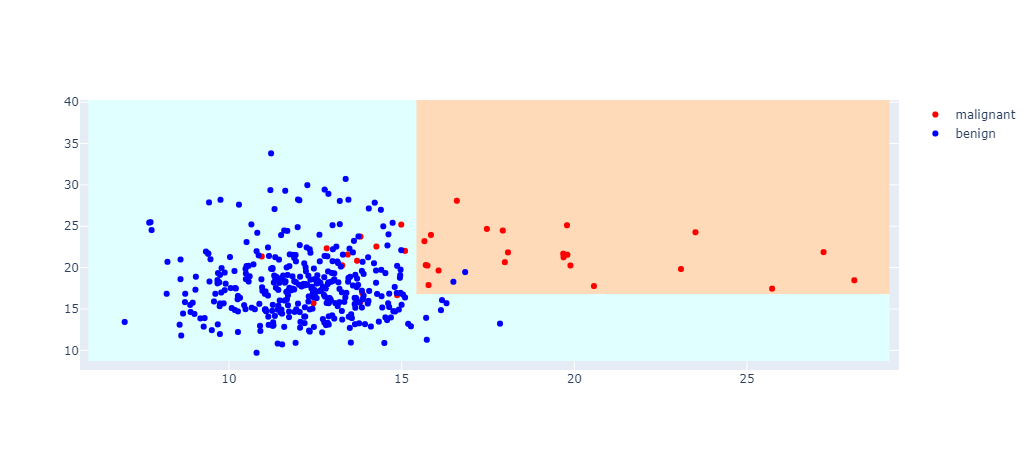

In [5]:
fig.show()